In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)      
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)

import os

### Merging 12 months of data into one CSV

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

# Create a classified list out of all files in the directory
files = [file for file in os.listdir('./Sales_Data')]

# Create empty DF for all months
all_months = pd.DataFrame()

# Loop through files in new list, exclud the ipnyb
for file in files:
    if file != '.ipynb_checkpoints':
        print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### Concatanate the CSV's - turn them into new DF (all_data)

In [3]:
for file in files:
    if file != '.ipynb_checkpoints':
        df = pd.read_csv(f"./Sales_Data/{file}")
        all_months = pd.concat([all_months, df])

all_months.head(5)


#all_months.to_csv("all_data.csv", index=False)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with aditional columns 

In [4]:
all_data = pd.read_csv('all_data.csv')

In [5]:
len(all_data)

560547

#### Filter NaN, drop all rows

In [6]:
nan = all_data[all_data.isna().any(axis=1)]
len(nan)

1632

In [7]:
all_data = all_data.dropna()
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'OR' in Order Date column and delete it 

In [8]:
Or = all_data[all_data['Order Date'].str[0:2] == 'Or']
Or.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1148,1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1154,1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2877,2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2892,2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
len(Or)

1065

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Add month column after filtering out "OR" and "Nan"

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [12]:
all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...,...
560542,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
560543,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
560544,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
560545,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Add sales column

In [13]:
all_data.dtypes

Unnamed: 0           int64
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [14]:
numeric = ['Quantity Ordered','Price Each']
all_data[numeric] = all_data[numeric].apply(pd.to_numeric)

In [15]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [17]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [18]:
all_data.dtypes

Unnamed: 0            int64
Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

### Part 1: Which month had the best sales? How many sales were generated that month?

In [19]:
all_data.groupby('Month').sum()

,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,
1,142299735,32709,5435305.14,5466770.19
2,216369591,40347,6566654.16,6606067.26
3,346000761,51015,8373623.49,8421301.14
4,503878044,61674,10103013.06,10172010.72
5,413487693,56001,9405375.39,9457820.25
6,276991068,45759,7686076.83,7733406.78
7,308256015,48216,7897618.68,7943327.28
8,215474853,40344,6691036.26,6733403.64
9,203589096,39327,6254976.27,6292680.39


In [20]:
sales = all_data.groupby('Month').sum()

#### Visualize the months sales with a bar chart

In [21]:
import matplotlib.pyplot as plt 
import numpy as np

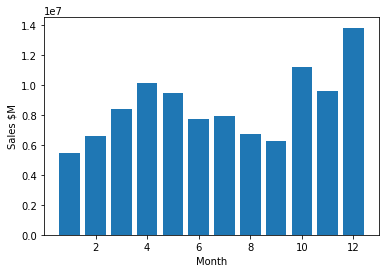

In [22]:
sales = all_data.groupby('Month').sum()
months = range(1,13)

sales2 = sales['Sales']

x = np.array([sales2])

plt.bar(months, sales2)
plt.xticks()
plt.xlabel("Month")
plt.ylabel("Sales $M")
plt.show()


### Which city had the highest number of sales ? 

In [23]:
all_data['Purchase Address'].iloc[100:110]

100         880 Lakeview St, Seattle, WA 98101
101     848 Center St, San Francisco, CA 94016
102    12 Lakeview St, New York City, NY 10001
103       774 Forest St, Los Angeles, CA 90001
104       573 Pine St, San Francisco, CA 94016
105            804 Church St, Dallas, TX 75001
106              267 West St, Boston, MA 02215
107              522 6th St, Atlanta, GA 30301
108         678 Hickory St, Portland, OR 97035
109          450 Johnson St, Seattle, WA 98101
Name: Purchase Address, dtype: object

In [24]:
address = '880 Lakeview St, Seattle, WA 98101'
address

'880 Lakeview St, Seattle, WA 98101'

In [25]:
z = address.split(", ")
z[1]

'Seattle'

In [26]:
x = all_data['Purchase Address'].str.split(", ")
x[1][1]

'Boston'

#### Split "Puchase Address" columns by comma, and convert the middle [1] into a city column 

In [27]:
all_data['City'] = all_data['Purchase Address'].str.split(", ").str[1]
all_data['City']

0                Dallas
1                Boston
2           Los Angeles
3           Los Angeles
4           Los Angeles
              ...      
560542      Los Angeles
560543    San Francisco
560544    San Francisco
560545    San Francisco
560546    San Francisco
Name: City, Length: 557850, dtype: object

In [28]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [29]:
by_city = all_data.groupby('City').sum()
by_city

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta,368780046,49806,8339724.60,314382,8386495.74
Austin,248125452,33459,5429620.83,209487,5458745.25
Boston,497270586,67584,10912229.31,423336,10984926.03
Dallas,372920937,50190,8257883.46,313860,8303926.20
Los Angeles,743220813,99867,16264305.69,624975,16357712.40
New York City,625311048,83796,13906112.49,527223,13992952.29
Portland,312127383,42159,6923242.41,263295,6961471.83
San Francisco,1117694229,150717,24634385.22,946560,24786611.73
Seattle,367180353,49659,8199888.03,314823,8243266.44


#### Plot the sales by city on a bar chart

['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']


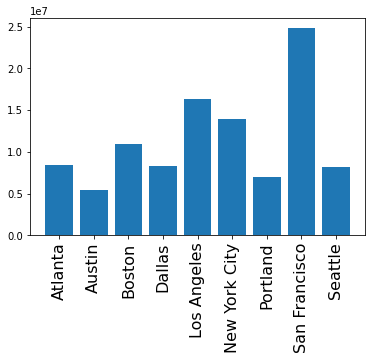

In [30]:
cities = [city for city,df in all_data.groupby('City')]

print(cities)

plt.bar(cities, by_city['Sales'])
plt.xticks(cities, rotation='vertical', fontsize=16)

plt.show()


## At what time of the day should we display our ads to maximize sales revenues? 

In [31]:
# Convert to datetime 
all_data['Order Date'] = all_data['Order Date'].astype('datetime64[ns]')

In [32]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [33]:
# Make new columns to split the the order date into hours and minutes 
all_data['Order Time'] = all_data['Order Date'].dt.time
all_data['Order Time'] 

0         08:46:00
1         22:30:00
2         14:38:00
3         14:38:00
4         09:27:00
            ...   
560542    20:56:00
560543    16:00:00
560544    07:39:00
560545    17:30:00
560546    00:18:00
Name: Order Time, Length: 557850, dtype: object

In [34]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [35]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time,Hour,Minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08:46:00,8,46
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22:30:00,22,30
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38:00,14,38
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38:00,14,38
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,09:27:00,9,27


In [36]:
# Group data by the order time (sum) 
times = all_data.groupby('Hour').sum().sort_values(by='Sales', ascending=False)

In [37]:
times

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,,
19,324488799,43410,7195764.93,274167,7238815.62,1143126
12,315551985,42606,6899630.04,267483,6950464.02,1106037
11,311007615,42015,6866565.54,262962,6901830.72,1106856
20,302162772,41304,6804555.48,259125,6845148.72,1062258
18,307836759,41406,6623090.79,259263,6658044.90,1115064
13,303422922,41055,6419231.58,257424,6466169.40,1053135
17,271820757,36687,6350331.06,232362,6388084.83,970284
14,273025782,37086,6216584.31,233508,6251018.19,967689
21,274517976,36732,6092291.49,231309,6126002.58,936186


In [38]:
hour = [x for x,y in all_data.groupby('Hour')]
print(hour)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [39]:
all_data.groupby('Hour').sum()

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,,
0,97968729,13284,2127890.10,82662,2141163.81,310788
1,60148821,7857,1375470.00,49971,1382600.64,185421
2,30497604,4194,701500.92,25521,704554.32,97524
3,20692647,2784,434179.26,17712,437273.67,69132
4,21891411,2811,486174.54,18444,487983.03,80628
5,33506991,4479,688863.63,27903,692039.46,128631
6,62596149,8430,1335000.33,52617,1344339.00,241029
7,101078790,13668,2221704.33,86550,2234562.36,382341
8,156715182,21006,3557911.86,130878,3577046.91,594405


In [72]:
count = all_data.groupby(['Hour']).count()
count

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time,Minute
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


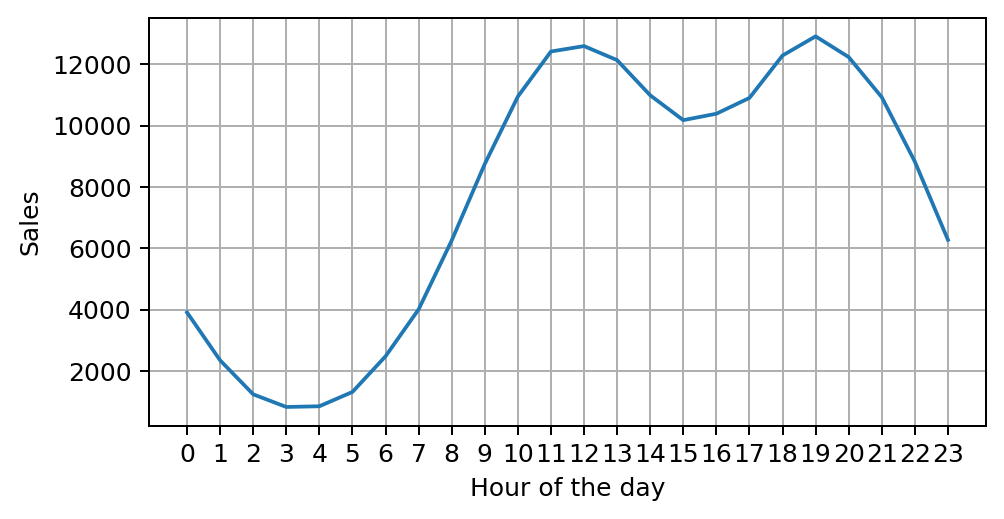

In [77]:
quantity = count['Quantity Ordered']
quantity

plt.figure(figsize=(6,3), dpi=180)
plt.plot(hour, quantity)
plt.xticks(hour)
plt.grid()

plt.xlabel('Hour of the day')
plt.ylabel('Sales')

plt.show()

### Which items are sold most often together?

In [42]:
all_data.loc[all_data['Order ID'] == '176560']

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time,Hour,Minute
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38:00,14,38
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38:00,14,38
186851,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38:00,14,38
186852,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38:00,14,38
373700,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38:00,14,38
373701,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38:00,14,38


In [43]:
all_data['Product'].value_counts()

USB-C Charging Cable          65709
Lightning Charging Cable      64974
AAA Batteries (4-pack)        61923
AA Batteries (4-pack)         61731
Wired Headphones              56646
Apple Airpods Headphones      46647
Bose SoundSport Headphones    39975
27in FHD Monitor              22521
iPhone                        20526
27in 4K Gaming Monitor        18690
34in Ultrawide Monitor        18543
Google Phone                  16575
Flatscreen TV                 14400
Macbook Pro Laptop            14172
ThinkPad Laptop               12384
20in Monitor                  12303
Vareebadd Phone                6195
LG Washing Machine             1998
LG Dryer                       1938
Name: Product, dtype: int64

In [44]:
len(all_data)

557850

### Group new df by duplicates

In [45]:
all_data = all_data.drop_duplicates()
len(all_data)

185950

In [46]:
all_data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [47]:
all_data.loc[all_data['Order ID'] == '176560']

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time,Hour,Minute
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14:38:00,14,38
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14:38:00,14,38


In [48]:
data = all_data[all_data['Order ID'].duplicated(keep=False)]
data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
data = data[['Order ID','Grouped']].drop_duplicates()

C:\Users\Michaelze\AppData\Local\Temp\ipykernel_23092\3991710654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [49]:
data.head()

,Order ID,Grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [50]:
data.dtypes

Order ID    object
Grouped     object
dtype: object

In [51]:
list(data['Grouped'].iloc[0:15].str.split(','))

[['Google Phone', ' Wired Headphones'],
 ['Google Phone', ' USB-C Charging Cable'],
 ['Bose SoundSport Headphones', ' Bose SoundSport Headphones'],
 ['AAA Batteries (4-pack)', ' Google Phone'],
 ['Lightning Charging Cable', ' USB-C Charging Cable'],
 ['Apple Airpods Headphones', ' ThinkPad Laptop'],
 ['Bose SoundSport Headphones', ' AAA Batteries (4-pack)'],
 ['34in Ultrawide Monitor', ' Google Phone'],
 ['Lightning Charging Cable', ' USB-C Charging Cable'],
 ['iPhone', ' Lightning Charging Cable'],
 ['Google Phone', ' Bose SoundSport Headphones', ' Wired Headphones'],
 ['Google Phone', ' USB-C Charging Cable'],
 ['Google Phone', ' Wired Headphones'],
 ['Google Phone', ' Wired Headphones'],
 ['AAA Batteries (4-pack)', ' 27in FHD Monitor']]

### Counting Pairs of Prodcuts 

In [52]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in data['Grouped']:
    row_list = row.split(',')
    count.update(combinations(row_list, 2))

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

In [53]:
for row in data['Grouped']:
    combo = combinations(row.split(','),2)
    hmm = Counter(combo).most_common(10)



### What product sold the most ?

In [78]:
quant = all_data.groupby('Product').sum()

In [79]:
quant['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


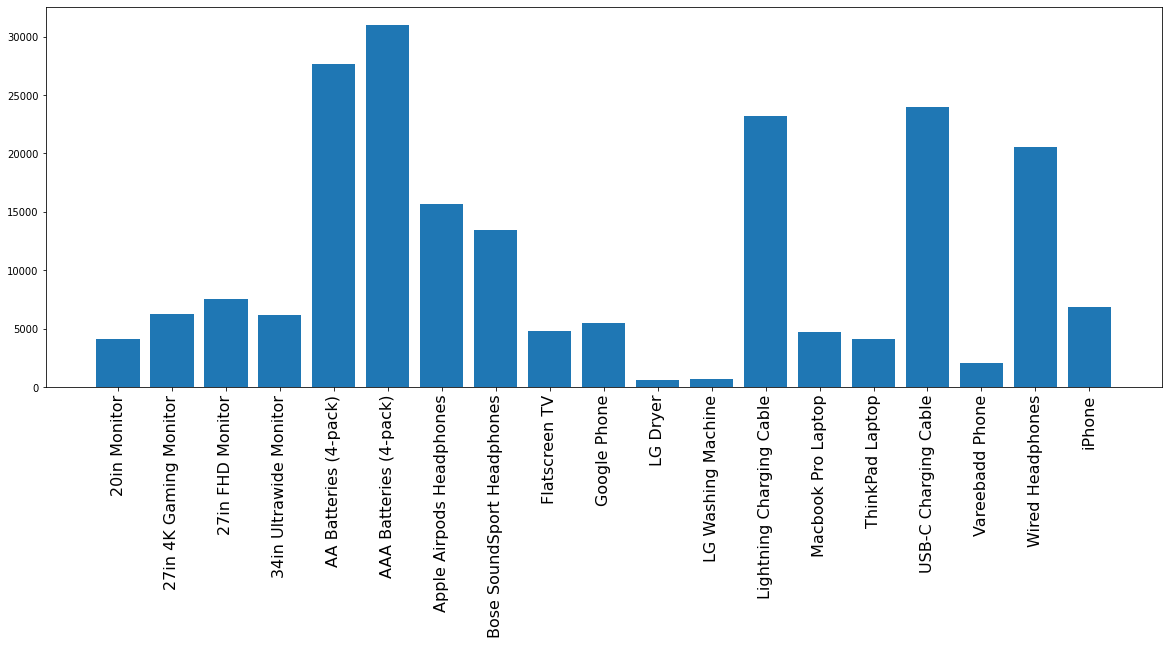

In [80]:
prods = [prod for prod,df in all_data.groupby('Product')]

print(prods)

plt.figure(figsize=[20,7])
plt.bar(prods, quant['Quantity Ordered'])
plt.xticks(prods, rotation='vertical', fontsize=16)

plt.show()

In [81]:
prices = all_data.groupby('Product')['Price Each'].unique()
print(prices)

Product
20in Monitor                  [109.99]
27in 4K Gaming Monitor        [389.99]
27in FHD Monitor              [149.99]
34in Ultrawide Monitor        [379.99]
AA Batteries (4-pack)           [3.84]
AAA Batteries (4-pack)          [2.99]
Apple Airpods Headphones       [150.0]
Bose SoundSport Headphones     [99.99]
Flatscreen TV                  [300.0]
Google Phone                   [600.0]
LG Dryer                       [600.0]
LG Washing Machine             [600.0]
Lightning Charging Cable       [14.95]
Macbook Pro Laptop            [1700.0]
ThinkPad Laptop               [999.99]
USB-C Charging Cable           [11.95]
Vareebadd Phone                [400.0]
Wired Headphones               [11.99]
iPhone                         [700.0]
Name: Price Each, dtype: object


C:\Users\Michaelze\AppData\Local\Temp\ipykernel_23092\2118434555.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prods, rotation=75, fontsize=16)


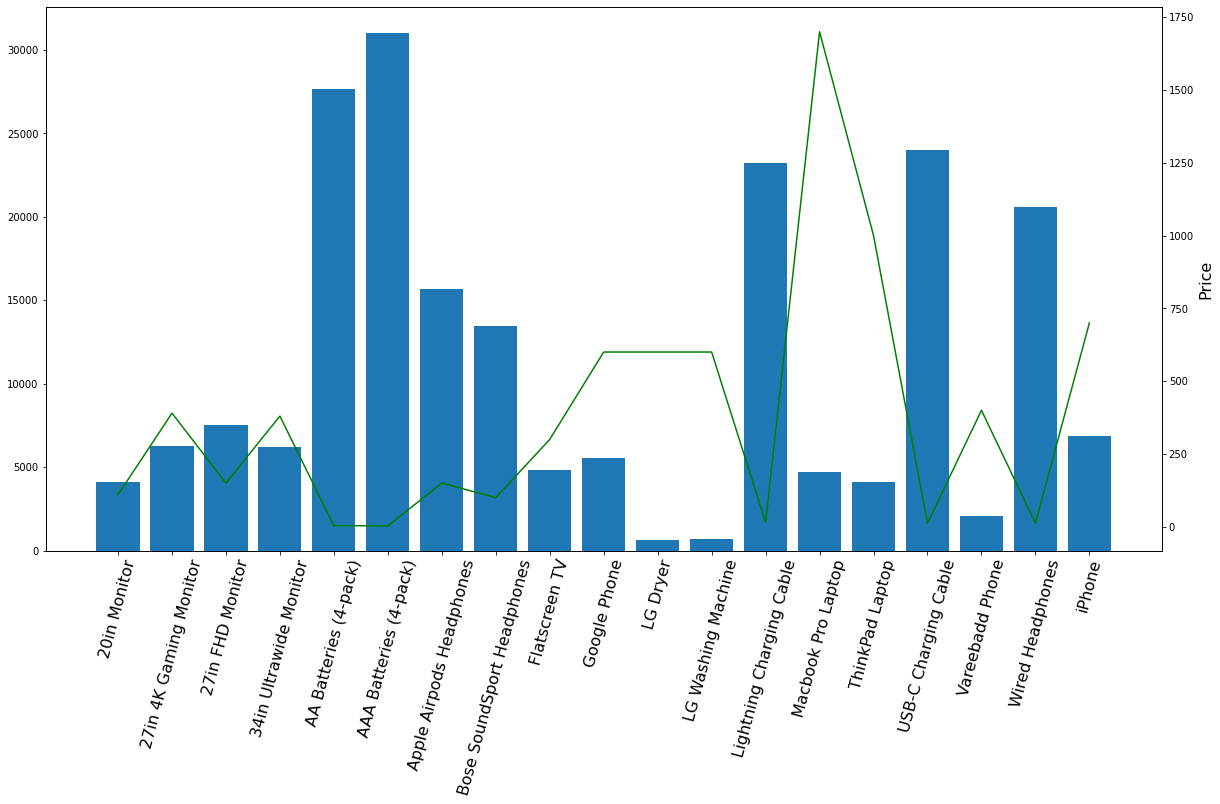

In [102]:
prices = all_data.groupby('Product')['Price Each'].unique()


fig, ax1 = plt.subplots(figsize=[20,10])

ax2 = ax1.twinx()
ax1.bar(prods, quant['Quantity Ordered'])
ax2.plot(prods, prices, 'g-')
ax1.set_xticklabels(prods, rotation=75, fontsize=16)
ax2.set_ylabel('Price', fontsize=16)

plt.show()
